In [1]:
import datetime
import codecs
import random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
pattern="ab"
text="ababaaabab"

# zadanie 1 Implementacja algorytmów

In [3]:
def naive(text,pattern):
    found=[]
    for i in range(len(text)):
        for j in range(min(len(text)-i,len(pattern))):
            if text[i+j]!=pattern[j]:
                break
            if j==len(pattern)-1:
                found.append(i)
    return found

In [4]:
def prefix_suffix(pattern):
    length=0
    n=len(pattern)-1
    for j in range(n):
        if pattern[n-j:n+1]==pattern[:j+1]:
            length=j+1
    return length

In [5]:
def prefix_suffix_arr(pattern):
    steps=[0 for i in pattern]
    for i in range(len(pattern)):
        word=pattern[:i+1]
        steps[i]=prefix_suffix(word)
    return steps

In [6]:
def kmp(text,pattern):
    found=[]
    j=0
    steps=prefix_suffix_arr(pattern)
    for i in range(len(text)):
        while j<min(len(text)-i,len(pattern)):
            if text[i+j]!=pattern[j]:
                j=steps[j]
                break
            if j==len(pattern)-1:
                found.append(i)
                j=0
                break
            else:
                j+=1
    return found

In [7]:
def matrix_construction(pattern,alphabet):
    states=[[0 for j in range(len(alphabet))]for i in range(len(pattern)+1)]
    for s in range (len(pattern)):
        for a in range(len(alphabet)):
            if alphabet[a]==pattern[s]:
                states[s][a]=(s+1)
            else:
                current=pattern[:s]+alphabet[a]
                length=prefix_suffix(current)
                states[s][a]=length
    for a in range(len(alphabet)):
        current=pattern+alphabet[a]
        length=prefix_suffix(current)
        states[-1][a]=length
    return states

In [8]:
def automaton(text,pattern):
    alphabet=list(set([p for p in pattern]))
    alphabet_dict={}
    for i in range(len(alphabet)):
        alphabet_dict[alphabet[i]]=i
    state=0
    found=[]
    matrix=matrix_construction(pattern,alphabet)
    for i,t in enumerate(text):
        if t in alphabet_dict:
            index=alphabet_dict[t]
            state=matrix[state][index]
            if state==len(pattern):
                found.append(i-state+1)
        else:
            state = 0
    return found

# zadanie 2 Implementacja testów

In [9]:
def naive_test(text,pattern):
    start=datetime.datetime.now()
    found=[]
    for i in range(len(text)):
        for j in range(min(len(text)-i,len(pattern))):
            if text[i+j]!=pattern[j]:
                break
            if j==len(pattern)-1:
                found.append(i)
    return (datetime.datetime.now()-start).microseconds

In [10]:
def kmp_test(text,pattern):
    start=datetime.datetime.now()
    found=[]
    j=0
    steps=prefix_suffix_arr(pattern)
    preprocessing = datetime.datetime.now()-start
    start=datetime.datetime.now()
    for i in range(len(text)):
        while j<min(len(text)-i,len(pattern)):
            if text[i+j]!=pattern[j]:
                j=steps[j]
                break
            if j==len(pattern)-1:
                found.append(i)
                j=0
                break
            else:
                j+=1
    return (preprocessing.microseconds,(datetime.datetime.now()-start).microseconds)

In [11]:
def automaton_test(text,pattern):
    start=datetime.datetime.now()
    alphabet=list(set([p for p in pattern]))
    alphabet_dict={}
    for i in range(len(alphabet)):
        alphabet_dict[alphabet[i]]=i
    state=0
    found=[]
    matrix=matrix_construction(pattern,alphabet)
    preprocessing = datetime.datetime.now()-start
    start=datetime.datetime.now()
    for i,t in enumerate(text):
        if t in alphabet_dict:
            index=alphabet_dict[t]
            state=matrix[state][index]
            if state==len(pattern):
                found.append(i-state+1)
        else:
            state = 0
    return (preprocessing.microseconds,(datetime.datetime.now()-start).microseconds)

rozmiar danych: 	10000	50000	100000	500000	1000000	
czas preprocessingu: 
automat skończony: 	1999	1996	1995	992	997	
algorytm KMP: 		997	0	0	0	0	
czas działania algorytmu: 
automat skończony: 	993	6978	13962	60798	128656	
algorytm KMP: 		3990	21943	47911	224405	447802	
algorytm naiwny: 	5984	29920	61796	301195	590462	

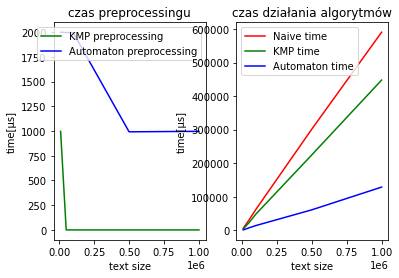

In [12]:
alph=[chr(i) for i in range(32,64)]
text_sizes=[10000,50000,100000,500000,1000000]
test_texts=[[random.choice(alph) for i in range(j)]for j in text_sizes]
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.set_title('czas preprocessingu')
ax2.set_title('czas działania algorytmów')
ax1.set(xlabel='text size', ylabel='time[μs]')
ax2.set(xlabel='text size', ylabel='time[μs]')
k_pre,k_time,a_pre,a_time,n_time=[],[],[],[],[]
for t in test_texts:
    pattern = "".join(t[:25])
    n2=naive_test(t,pattern)
    k1,k2=kmp_test(t,pattern)
    a1,a2=automaton_test(t,pattern)
    n_time.append(n2)
    a_time.append(a2)
    k_time.append(k2)
    a_pre.append(a1)
    k_pre.append(k1)
ax1.plot(text_sizes,k_pre,'green',label='KMP preprocessing')
ax1.plot(text_sizes,a_pre,'blue',label='Automaton preprocessing')
ax2.plot(text_sizes,n_time,'red',label='Naive time')
ax2.plot(text_sizes,k_time,'green',label='KMP time')
ax2.plot(text_sizes,a_time,'blue',label='Automaton time')
ax1.legend()
ax2.legend()
print('rozmiar danych: ',end="\t")
for s in text_sizes:
    print(s,end="\t")
print('\nczas preprocessingu: ')
print('automat skończony: ',end="\t")
for a in a_pre:
    print(a,end="\t")
print('\nalgorytm KMP: ',end="\t\t")
for k in k_pre:
    print(k,end="\t")
print('\nczas działania algorytmu: ')
print('automat skończony: ',end="\t")
for a in a_time:
    print(a,end="\t")
print('\nalgorytm KMP: ',end="\t\t")
for k in k_time:
    print(k,end="\t")
print('\nalgorytm naiwny: ',end="\t")
for n in n_time:
    print(n,end="\t")

# zadanie 3

In [13]:
with codecs.open('pan-tadeusz.txt', encoding='utf-8') as f:
    content=f.read()
print("Dopasowanie wzorca pan:")
print("Automat skończony:\t",len(automaton(content,"pan")))
print("Algorytm KMP:\t\t",len(kmp(content,"pan")))
print("Algorytm naiwny:\t",len(naive(content,"pan")))
print("Dopasowanie wzorca pani:")
print("Automat skończony:\t",len(automaton(content,"pani")))
print("Algorytm KMP:\t\t",len(kmp(content,"pani")))
print("Algorytm naiwny:\t",len(naive(content,"pani")))

Dopasowanie wzorca pan:
Automat skończony:	 401
Algorytm KMP:		 401
Algorytm naiwny:	 401
Dopasowanie wzorca pani:
Automat skończony:	 100
Algorytm KMP:		 100
Algorytm naiwny:	 100


# zadanie 4

In [14]:
with codecs.open('pan-tadeusz.txt', encoding='utf-8') as f:
    content=f.read()
preprocessing=[]
times=[]
pattern = "pan"
for i in range(10):
    n2=naive_test(t,pattern)
    k1,k2=kmp_test(t,pattern)
    a1,a2=automaton_test(t,pattern)
    times.append([n2,k2,a2])
    preprocessing.append([k1,a1])

In [15]:
times=np.array(times)
prep=np.array(preprocessing)


Algorytm naiwny:
czas średni:  616451.7  μs
czas minimalny:  603386  μs
czas maksymalny:  640289  μs

Algorytm KMP:
czas średni:  463199.8  μs
czas minimalny:  450840  μs
czas maksymalny:  509636  μs
średni czas preprocessingu:  616451.7  μs
minimalny czas preprocessingu:  603386  μs
maksymalny czas preprocessingu:  640289  μs

Automat Skończony:
czas średni:  69207.5  μs
czas minimalny:  66776  μs
czas maksymalny:  72807  μs
średni czas preprocessingu:  463199.8  μs
minimalny czas preprocessingu:  450840  μs
maksymalny czas preprocessingu:  509636  μs


Text(0.5, 1.0, 'maksymalny')

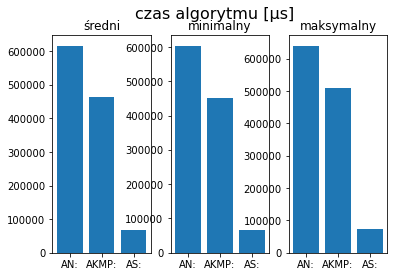

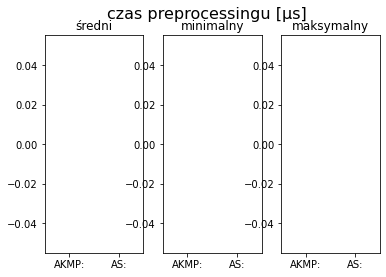

In [16]:
avg_times=np.sum(times,axis = 0)/10
min_times=np.min(times,axis = 0)
max_times=np.max(times,axis = 0)
avg_prep=np.sum(prep,axis = 0)/10
min_prep=np.min(prep,axis = 0)
max_prep=np.max(prep,axis = 0)
algorithms = ["\nAlgorytm naiwny:","\nAlgorytm KMP:","\nAutomat Skończony:"]
plt_alg = ["AN:","AKMP:","AS:"]
for i in range(3):
    print(algorithms[i])
    print("czas średni: ",avg_times[i],' μs')
    print("czas minimalny: ",min_times[i],' μs')
    print("czas maksymalny: ",max_times[i],' μs')
    if i>0:
        print("średni czas preprocessingu: ",avg_times[i-1],' μs')
        print("minimalny czas preprocessingu: ",min_times[i-1],' μs')
        print("maksymalny czas preprocessingu: ",max_times[i-1],' μs')
fig, ax = plt.subplots(1,3)
fig.suptitle('czas algorytmu [μs]', fontsize=16)
ax[0].bar(plt_alg,avg_times)
ax[1].bar(plt_alg,min_times)
ax[2].bar(plt_alg,max_times)
ax[0].set_title("średni")
ax[1].set_title("minimalny")
ax[2].set_title("maksymalny")
fig1, ax1 = plt.subplots(1,3)
fig1.suptitle('czas preprocessingu [μs]', fontsize=16)
ax1[0].bar(plt_alg[1:],avg_prep)
ax1[1].bar(plt_alg[1:],min_prep)
ax1[2].bar(plt_alg[1:],max_prep)
ax1[0].set_title("średni")
ax1[1].set_title("minimalny")
ax1[2].set_title("maksymalny")

# zadanie 5

In [17]:
text="ab"*1000
pattern="ab"*1000
n=naive_test(text,pattern)
k1,k=kmp_test(text,pattern)
a1,a=automaton_test(text,pattern)
print("Czas działania algorytmu naiwnego: ",n)
print("Czas działania algorytmu KMP\t: ",k)
print("Czas działania automatu skończonego: ",a)

Czas działania algorytmu naiwnego:  218753
Czas działania algorytmu KMP	:  3029
Czas działania automatu skończonego:  0


# zadanie 6

Możemy zauważy, że spośród zaimplementowanych algorytmów najszybszy okazuje się skończony automat. Może się zdarzyć, że będzie ustępował on wprawdzie pod względem czasu preprocessingu algorytmowi KMP (w naszym wypadku akurat oba te czasy były na tyle małe, że python uznał je za 0), jednak dzięki temu całość wyszukiwania jest znacznie sprawniejsza. Algorytm KMP jest z kolei sprawniejszy od algorytmu naiwnego. Jednakże różnica ta niweluje się, wtedy, gdy wzorzec jest bardzo krótki (np. 2 znaki).